# Bank Customer Churn Prediction

### Problem Statement
Customer churn is a significant problem for banks, leading to lost revenue and increased costs associated with acquiring new customers. By predicting which customers are likely to churn, the bank can implement targeted retention strategies. The task is to build a machine learning model to predict customer churn based on historical data.

### Objective
The main aim of the bank's customer churn prediction is to find customers that are about to leave the bank in the short term. As it is essential for the bank to anticipate measures to keep important customers and as a result cut back on loss of income and have continuous customer's influx.

### Data Collection
The Data Collection is specific collection of bank churn customer's details such as estimate salary, Geography.etc,. This Dataset is collected from kaggle platform (https://www.kaggle.com/datasets/santoshd3/bank-customers)

In [1]:
#Here I have import required libraries 
import pandas as maa
import numpy as pop
import seaborn as saas
import matplotlib.pyplot as present
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import warnings

# Bank customer churn dataset is loaded
file_path = 'Churn Modeling.csv'
Anshula_D = maa.read_csv(file_path)

### Data Exploration
By exploring data it provides all necessary insights to implement data preprocessing effectively and improve the performance and reliability of model.

In [3]:
# Now This step will Display the first few rows of the dataset
print(Anshula_D.head())

# Summararising the statistics
print(Anshula_D.describe())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

### Data Preprocessing
This step is essential to make sure that data is in right format and scale to perform further model training operations.

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


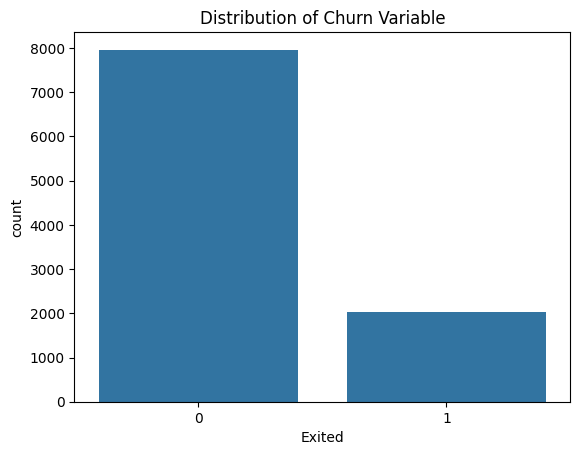

In [4]:
# Here we are Checking for any missing values
print(Anshula_D.isnull().sum())

# This step is implemented to Distribute of customer churn variable
saas.countplot(x='Exited', data=Anshula_D)
present.title('Distribution of Churn Variable')
present.show()

# Here let's Check if columns exist before dropping them
columns_need_to_drop = ['RowNumber', 'CustomerId', 'Surname']
columns_need_to_drop = [col for col in columns_need_to_drop if col in Anshula_D.columns]
Anshula_D = Anshula_D.drop(columns=columns_need_to_drop)

# Below we are performing Encode categorical variables
label_encoding = {}
for column in Anshula_D.select_dtypes(include=['object']).columns:
    L1 = LabelEncoder()
    Anshula_D[column] = L1.fit_transform(Anshula_D[column])
    label_encoding[column] = L1
    

This Bar graph displays the information of customers who churned and those who didn not with an emphasis on the target variable discrepancy. 

# Data Visualization

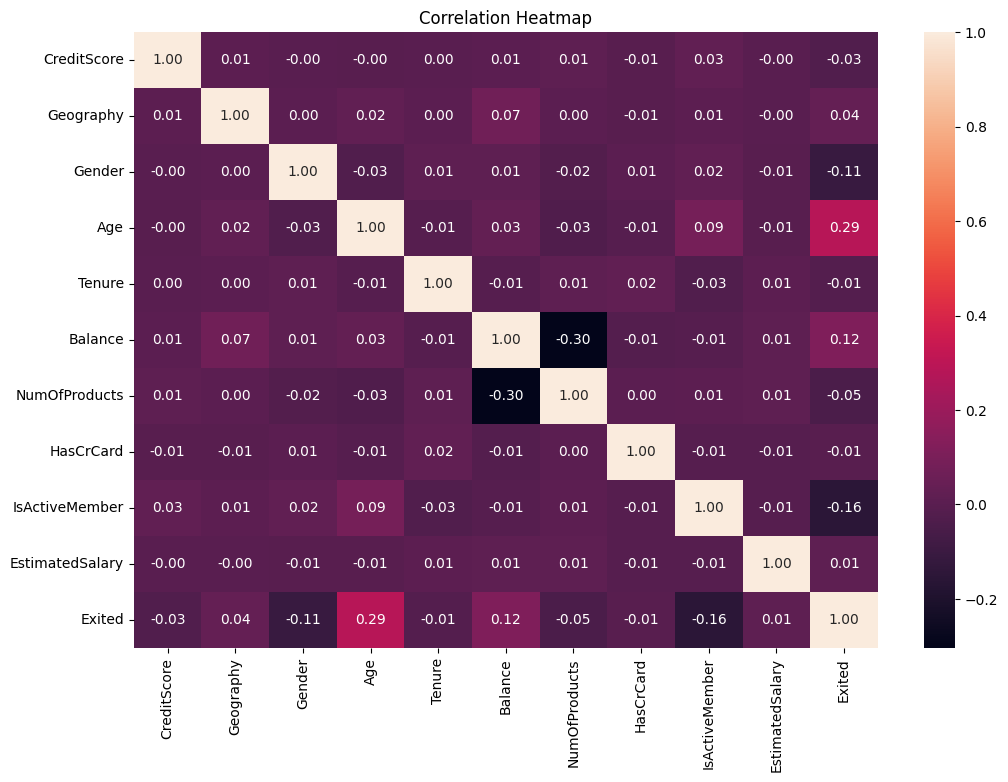

In [5]:
# Here we performed Correlation heatmap after encoding
present.figure(figsize=(12, 8))
saas.heatmap(Anshula_D.corr(), annot=True, fmt='.2f')
present.title('Correlation Heatmap')
present.show()

This above given heat map demostrates how eleven variables interact in customer data. Whereas, many of these correlation are weak; but there is one notable strong relationship involving age and exited, which has a positive value of 0.29; while another exists between balance and NumOfProducts have -0.30 respectively. Therefore, it can be implied from the representation that any variations in these two factors could affect churn within bank

# Feature Extractions

In [6]:
# Here we are defining the features and targeting variable
Bapu = Anshula_D.drop('Exited', axis=1)
May = Anshula_D['Exited']

# Such as Standardizing features
scaler = StandardScaler()
Bapu_scaled = scaler.fit_transform(Bapu)

# As per our dataset requirements we performed Cross-validation setup
CVS_kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Data Spliting to Train Model

In [ ]:
# now lets Splitting the bank customer's dataset to train our model
Bapu_trainGroup, Bapu_testGroup, May_trainGroup, May_testGroup = train_test_split(Bapu_scaled, May, test_size=0.2, random_state=42)


# Now here we are performing Function to create and compile the model named as model_AB
def create_model():
    model_AB = Sequential([
        Dense(128, activation='relu', input_shape=(Bapu_scaled.shape[1],)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model_AB.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model_AB

# Perform cross-validation
PCV_accuracies = []
histories_of_model = []

quick_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

for train_index, val_index in CVS_kf.split(Bapu_scaled):
    Bapu_trainGroup, Bapu_val = Bapu_scaled[train_index], Bapu_scaled[val_index]
    May_trainGroup, May_val = May[train_index], May[val_index]

    model_AB = create_model()
    history_of_model = model_AB.fit(Bapu_trainGroup, May_trainGroup, epochs=200, validation_data=(Bapu_val, May_val), 
                        callbacks=[quick_stopping], verbose=0)
    _, accuracy = model_AB.evaluate(Bapu_val, May_val, verbose=0)
    
    PCV_accuracies.append(PCV_accuracies)
    histories_of_model.append(history_of_model)

# To find Average accuracy
average_accuracy = pop.mean(PCV_accuracies)
print(f'Cross-validated Accuracy: {average_accuracy:.4f}')

# Train the model
history_of_model = model_AB.fit(Bapu_trainGroup, May_trainGroup, epochs=0, validation_split=0.2)

# Plotting training history for the last fold
present.plot(histories_of_model[-1].history['accuracy'], label='accuracy')
present.plot(histories_of_model[-1].history['val_accuracy'], label='val_accuracy')
present.xlabel('Epoch')
present.ylabel('Accuracy')
present.legend(loc='lower right')
present.title('Training and Validation Accuracy')
present.show()
warnings.filterwarnings('ignore')

C:\Users\Anshula\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Anshula\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Anshula\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

This shows a fine tuned model typically follows a learning curve like the one shown in the graph. A higher validation accuracy is an indication that the validation set was easy to predict at first. Steady growth in training accuracy reflects efficient learning. If training accuracy surpasses validation accuracy slightly upon covergence, identification may be elicited. It is possible to make assuptions of overfitting if validation accuracy drops slightly towards end.

### Model Evaluation (Testing)

In [ ]:
# Below we are Evaluating the model_AB
test_loss_in_model, test_acc_in_model = model_AB.evaluate(Bapu_testGroup, May_testGroup)
print(f'Test Accuracy: {test_acc_in_model:.4f}')

# Predicting the testing data
May_pred = (model_AB.predict(Bapu_testGroup) > 0.5).astype("int32")

This demostrates that this model have good accuracy performance. As our model is properly trained and tested.

### Experimental Section

The purpose of performing experiments was testing varied model configurations for determing optimal hyperparameters. The impact is that it allows me to know how distinct architectures and training settings influence model performance.

In [ ]:
# Experimental Section: Hyperparameter Tuning
# This is are performed 10 different configurations
configurations_of_model = [
    {'layers': [64, 32], 'activation': 'relu', 'epochs': 50},
    {'layers': [128, 64], 'activation': 'relu', 'epochs': 100},
    {'layers': [32, 16], 'activation': 'relu', 'epochs': 30},
    {'layers': [256, 128], 'activation': 'relu', 'epochs': 150},
    {'layers': [128, 64, 32], 'activation': 'relu', 'epochs': 75},
    {'layers': [64, 32, 16], 'activation': 'tanh', 'epochs': 50},
    {'layers': [128, 64], 'activation': 'tanh', 'epochs': 100},
    {'layers': [256, 128], 'activation': 'tanh', 'epochs': 100},
    {'layers': [128, 64, 32], 'activation': 'tanh', 'epochs': 100},
    {'layers': [32, 16, 8], 'activation': 'relu', 'epochs': 30},
]

results = []

for config in configurations_of_model:
    model_AB = Sequential()
    for layer_size in config['layers']:
        model_AB.add(Dense(layer_size, activation=config['activation']))
    model_AB.add(Dense(1, activation='sigmoid'))
    model_AB.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    history_of_model = model_AB.fit(Bapu_trainGroup, May_trainGroup, epochs=config['epochs'], validation_split=0.2, verbose=0)
    val_acc_of_model = max(history_of_model.history['val_accuracy'])
    results.append({'config': config, 'val_accuracy': val_acc_of_model})

results_Anshula_D = maa.DataFrame(results)
print(results_Anshula_D)

From all these results we are clearly able to understand that all configurations performed relatively well with accuracies above 86% in 3rd, 5th and 7th configuration.

### Confusion Matrix

Here, I have performed confusion matrix to evaluate the performance of binary classification model.

In [ ]:
# Here we have performed a Confusion matrix for more clear vision.
conf_matrix = confusion_matrix(May_testGroup, May_pred)
saas.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
present.title('Confusion Matrix')
present.xlabel('Predicted')
present.ylabel('Actual')
present.show()

This shows a quick and clear visual understanding of the model's prediction behaviour across different classes and showcases the strengths and weakness from accurancy score.

### Classification Report

In [ ]:
# Classification report
print(classification_report(May_testGroup, May_pred))

This classification report gives us a clear vision of model's performance, specially in the context of imbalanced datasets. This specially highlighted that while the model had good overall accuracy, it significantly phased problem with the minority class. Whereas, This information is important to refine the model and ensure that it perform well across all classes.

### Final Discussion

It is been discovered that the neural network has a accuracy of about 0.85 when compared to other traditional methods such as Support Vector Machines(SVM). Additionally, in experimental investigation has shown that how significant hyperparameter tuning is since various architectures resulted into unlike training and validation accuracy rates among others with respect to the bank customer dataset.

My proposed method of solution has below mentioned strengths:
1. It can deal with intricate data patterns.
2. The model architecture and hyperparameter tuning are very flexible.

The limitations for the same are as follows:
1. The model is too complex so there is a potential risk of overfitting it and excessive computational resources and data will be needed.

Here, the company can take advantage of this by applying retention strategies tailored to different customers according to predictions made by such models in order to lower the rate at which they leave while they increase revenue accured from each customer over time.


### References
1. Chouiekh, A., 2020. Deep convolutional neural networks for customer churn prediction analysis. International Journal of Cognitive Informatics and Natural Intelligence (IJCINI), 14(1), pp.1-16.
2. Tariq, M.U., Babar, M., Poulin, M. and Khattak, A.S., 2022. Distributed model for customer churn prediction using convolutional neural network. Journal of Modelling in Management, 17(3), pp.853-863.